In [1]:
from sklearn.datasets import load_iris

# 鸢尾花数据 聚类

In [2]:
iris = load_iris()

In [3]:
data = iris.data

In [4]:
target = iris.target

In [5]:
names = iris.feature_names

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler().fit(data)

In [8]:
iris_data = scaler.transform(data)

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3,random_state=123).fit(iris_data)

In [11]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [12]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [13]:
kmeans.predict(iris_data[:1000])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
target[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 聚类结果可视化

In [15]:
import pandas as pd

In [16]:
from sklearn.manifold import TSNE

In [17]:
import matplotlib.pyplot as plt

In [18]:
tsne = TSNE(n_components=2,init='random',random_state=177).fit(data)

In [57]:
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=177, verbose=0)

In [58]:
df = pd.DataFrame(tsne.embedding_)

In [66]:
df.head()

,0,1,labels
0,-25.630911,-3.806077,1
1,-22.992887,-2.629355,1
2,-23.096222,-3.821302,1
3,-22.647818,-3.401912,1
4,-25.659126,-3.630247,1


In [77]:
# df['labels'] = target
df['labels'] = kmeans.labels_

In [78]:
df1 = df[df['labels']==0]

In [84]:
df1.head()

,0,1,labels
50,14.465170,3.180959,0
52,14.866220,2.809475,0
77,15.509892,2.071644,0
100,19.749914,-0.765733,0
102,20.444836,0.973708,0


In [89]:
df2 = df[df['labels']==1]

In [90]:
df3 = df[df['labels']==2]

In [91]:
fig = plt.figure(figsize=(9,6))

<Figure size 648x432 with 0 Axes>

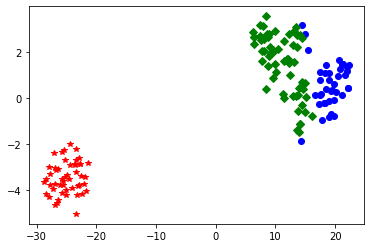

In [92]:
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',df3[0],df3[1],'gD')

# 使用FMI评价法取评价 k-means 聚类模型

In [93]:
from sklearn.metrics import fowlkes_mallows_score

In [94]:
for i in range(2,7):
    kmeans = KMeans(n_clusters=i,random_state=123).fit(data)
    score = fowlkes_mallows_score(target,kmeans.labels_)
    print(i,score)

2 0.7504732564880243
3 0.8208080729114153
4 0.7539699941396392
5 0.7254830776265845
6 0.614344977586966


# 使用轮廓系数评价法取评价 k-means 聚类模型

In [98]:
from sklearn.metrics import silhouette_score

sil_score = []

In [101]:
for  i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=123).fit(data)
    score = silhouette_score(data,kmeans.labels_)
    sil_score.append(score)

In [102]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

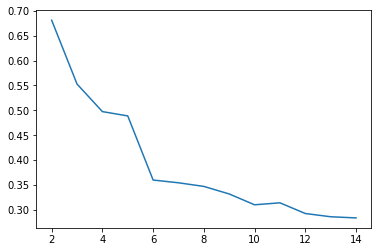

In [105]:
plt.plot(range(2,15),sil_score,linewidth=1.5,linestyle='-')

# Calinski-harabasz 指数评价法

In [107]:
from sklearn.metrics import calinski_harabasz_score

In [108]:
for  i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=123).fit(data)
    score = calinski_harabasz_score(data,kmeans.labels_)
    print(i,score)

2 513.9245459802768
3 561.62775662962
4 530.4871420421675
5 495.54148767768777
6 469.8366331329009
7 447.94303986000125
8 435.4354028965229
9 412.6456099594193
10 390.6547769002436
11 374.5210464253021
12 362.2769448427933
13 345.33431783859606
14 338.77345076983426
